![Youtube](./youtube-banner.jpg)

## Proyecto de analisis de Datos (Youtube)

### En este proyecto vamos a obtener informacion de un archivo de youtube sobre tendencias y videos mas reproducidos.

**Primero importemos las librerias que necesitamos**


In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import json as jsn
import geopandas as gpd

## Preprocesado y modelado
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

**Referenciar el CSV y el JSON**

Tenemos que referenciar el archivo CSV y el archivo JSON. Ambos estan unidos por el ID de la categoria, asi que tenemos que obtener la información de los nombres de las categorias del JSON para usarlo más adelante

In [ ]:
df_csv = pd.read_csv('CAvideos_cc50_202101.csv')

df_json = 'CA_category_id.json'
##Esto es opcional
##df_limpio = pd.read_csv('df_limpio.csv')

##Lo que necesitamos del archivo json es el nombre de la categoria, asi que lo extraemos para usarlo con el CSV
with open(df_json, 'r') as file:
    data = jsn.load(file)
categorias = {item['id']: item['snippet']['title'] for item in data['items']}

___
**Visualizar el nombre de las columnas**

Creamos una lista de las columnas que contiene el CSV

In [ ]:
list(df_csv.columns)

['video_id',
 'trending_date',
 'title',
 'channel_title',
 'category_id',
 'publish_time',
 'tags',
 'views',
 'likes',
 'dislikes',
 'comment_count',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description',
 'state',
 'lat',
 'lon',
 'geometry']

___
**Ver la informacion del archivo de datos**

In [ ]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40881 non-null  object 
 1   trending_date           40881 non-null  object 
 2   title                   40881 non-null  object 
 3   channel_title           40881 non-null  object 
 4   category_id             40881 non-null  int64  
 5   publish_time            40881 non-null  object 
 6   tags                    40881 non-null  object 
 7   views                   40881 non-null  int64  
 8   likes                   40881 non-null  int64  
 9   dislikes                40881 non-null  int64  
 10  comment_count           40881 non-null  int64  
 11  thumbnail_link          40881 non-null  object 
 12  comments_disabled       40881 non-null  bool   
 13  ratings_disabled        40881 non-null  bool   
 14  video_error_or_removed  40881 non-null

___
**Visualizar las variables y sus datos**

Podemos visualizar un poco de la información que vamos a manejar

In [ ]:
df_csv.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Manitoba,50.150025,-96.883322,POINT (-96.88332178 50.15002545)
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,British Columbia,49.099960,-116.516697,POINT (-116.516697 49.09996035)
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,New Brunswick,45.267042,-66.076675,POINT (-66.07667505000001 45.26704185)
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Saskatchewan,50.933311,-102.799989,POINT (-102.7999891 50.93331097)
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Alberta,53.016698,-112.816639,POINT (-112.8166386 53.01669802)


___
**Visualizar si hay datos Vacios**

In [ ]:
df_csv.isnull().sum()

,0
video_id,0
trending_date,0
title,0
channel_title,0
category_id,0
publish_time,0
tags,0
views,0
likes,0
dislikes,0


___
**Limpieza de CSV**

Visualizar los datos NA, ceros, datos atipicos y hacer el proceso de limpieza

In [ ]:
##Hay datos vacios en la descripcion asi que lo reemplazaremos con una descripcion propuesta
df_limpio=df_csv
df_limpio['description'].fillna('Sin descripcion', inplace=True)


<ipython-input-107-5e2f2cd2a948>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio['description'].fillna('Sin descripcion', inplace=True)


Calidad de Los Datos

<Figure size 1200x600 with 0 Axes>

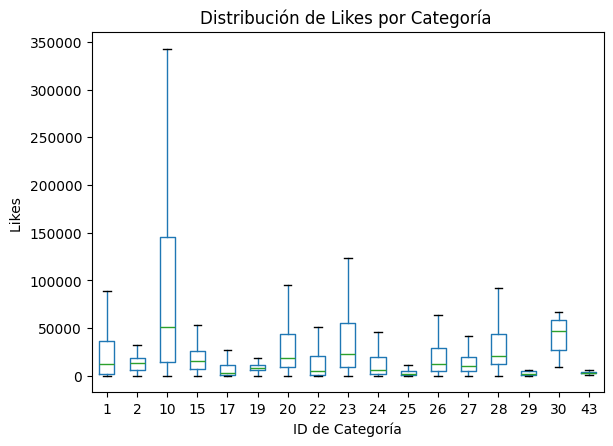

In [ ]:
plt.figure(figsize=(12, 6))
df_csv.boxplot(column='likes', by='category_id', grid=False, showfliers=False)
plt.title('Distribución de Likes por Categoría ')
plt.suptitle('')  # Quitar título automático del grupo
plt.xlabel('ID de Categoría')
plt.ylabel('Likes ')

plt.show()

<Figure size 1200x600 with 0 Axes>

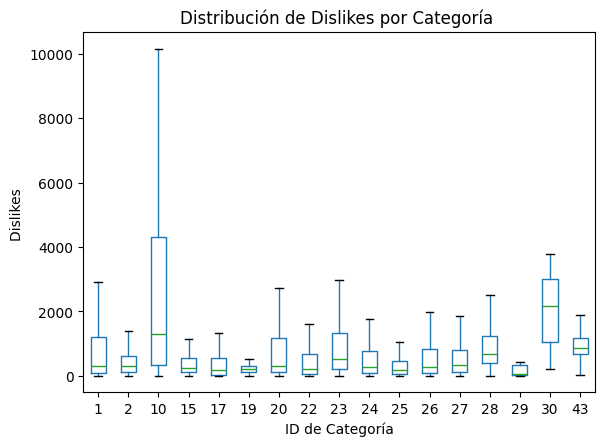

In [ ]:
plt.figure(figsize=(12, 6))
df_csv.boxplot(column='dislikes', by='category_id', grid=False, showfliers=False)
plt.title('Distribución de Dislikes por Categoría ')
plt.suptitle('')  # Quitar título automático del grupo
plt.xlabel('ID de Categoría')
plt.ylabel('Dislikes ')

plt.show()

<Figure size 1200x600 with 0 Axes>

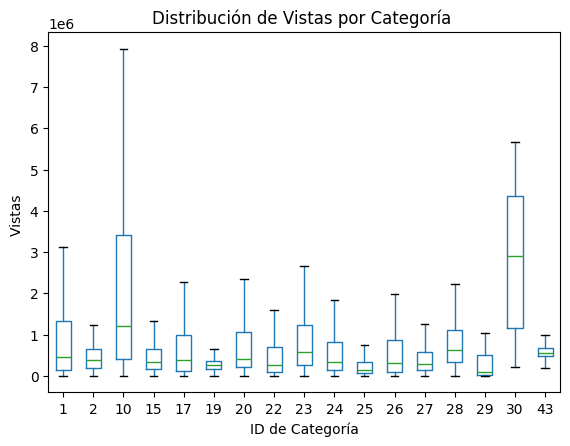

In [ ]:
plt.figure(figsize=(12, 6))
df_csv.boxplot(column='views', by='category_id', grid=False, showfliers=False)
plt.title('Distribución de Vistas por Categoría ')
plt.suptitle('')  # Quitar título automático del grupo
plt.xlabel('ID de Categoría')
plt.ylabel('Vistas ')

plt.show()

<Figure size 1200x600 with 0 Axes>

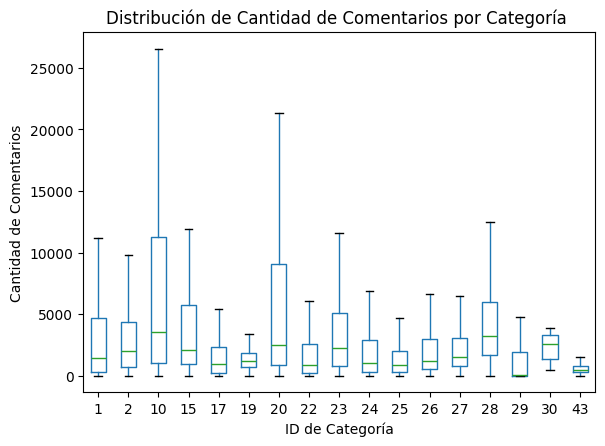

In [ ]:
plt.figure(figsize=(12, 6))
df_csv.boxplot(column='comment_count', by='category_id', grid=False, showfliers=False)
plt.title('Distribución de Cantidad de Comentarios por Categoría ')
plt.suptitle('')  # Quitar título automático del grupo
plt.xlabel('ID de Categoría')
plt.ylabel('Cantidad de Comentarios')

plt.show()

**Mostraremos la distribucion de Likes por categorias**

<ipython-input-16-61454f4fb212>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '19161.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_limpio.loc[(df_csv['category_id'] == categoria_id) &


<Figure size 1200x600 with 0 Axes>

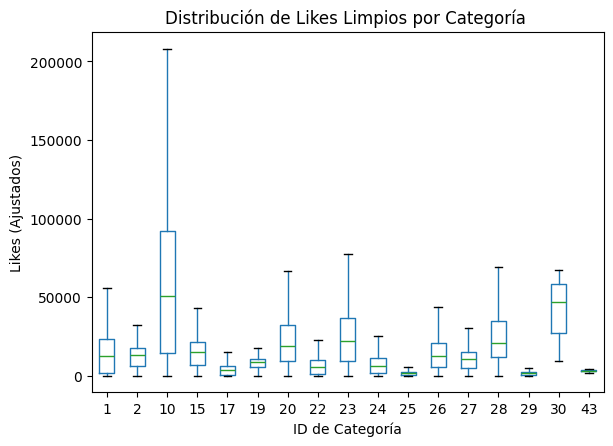

In [ ]:
# Calcular los límites por categoría usando el rango intercuartil (IQR)
def calcular_limites(categoria):
    q1 = categoria.quantile(0.25)
    q3 = categoria.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

# Crear columnas para guardar los valores ajustados
df_limpio['likes_cleaned'] = df_limpio['likes']

# Reemplazar valores atípicos por la mediana de su categoría
for categoria_id, grupo in df_limpio.groupby('category_id'):
    # Calcular límites específicos para esta categoría
    lower_bound, upper_bound = calcular_limites(grupo['likes'])
    mediana = grupo['likes'].median()

    # Reemplazar valores atípicos por la mediana de la categoría
    df_limpio.loc[(df_csv['category_id'] == categoria_id) &
               ((df_csv['likes'] < lower_bound) | (df_csv['likes'] > upper_bound)),
               'likes_cleaned'] = mediana

# Crear un boxplot para los valores ajustados
plt.figure(figsize=(12, 6))
df_limpio.boxplot(column='likes_cleaned', by='category_id', grid=False, showfliers=False)
plt.title('Distribución de Likes Limpios por Categoría ')
plt.suptitle('')  # Quitar título automático del grupo
plt.xlabel('ID de Categoría')
plt.ylabel('Likes (Ajustados)')

plt.show()

**Mostraremos la distribucion de dislikes por categorias**

<ipython-input-17-e1ef049a65f9>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '317.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_limpio.loc[(df_csv['category_id'] == categoria_id) &


<Figure size 1200x600 with 0 Axes>

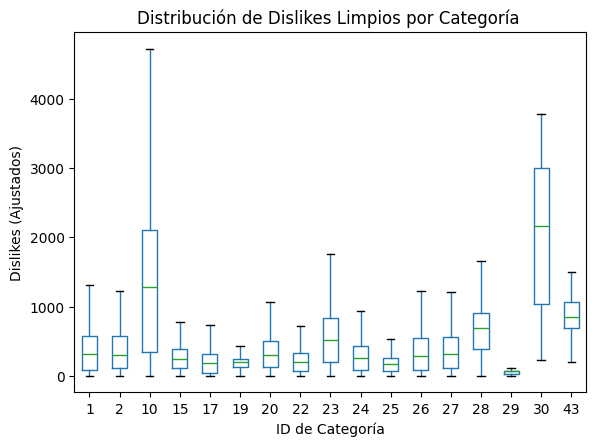

In [ ]:
# Calcular los límites por categoría usando el rango intercuartil (IQR)
def calcular_limites(categoria):
    q1 = categoria.quantile(0.25)
    q3 = categoria.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

# Crear columnas para guardar los valores ajustados
df_limpio['dislikes_cleaned'] = df_limpio['dislikes']

# Reemplazar valores atípicos por la mediana de su categoría
for categoria_id, grupo in df_limpio.groupby('category_id'):
    # Calcular límites específicos para esta categoría
    lower_bound, upper_bound = calcular_limites(grupo['dislikes'])
    mediana = grupo['dislikes'].median()

    # Reemplazar valores atípicos por la mediana de la categoría
    df_limpio.loc[(df_csv['category_id'] == categoria_id) &
               ((df_csv['dislikes'] < lower_bound) | (df_csv['dislikes'] > upper_bound)),
               'dislikes_cleaned'] = mediana


# Crear un boxplot para los valores ajustados
plt.figure(figsize=(12, 6))
df_limpio.boxplot(column='dislikes_cleaned',by='category_id', grid=False, showfliers=False)
plt.title('Distribución de Dislikes Limpios por Categoría ')
plt.suptitle('')  # Quitar título automático del grupo
plt.xlabel('ID de Categoría')
plt.ylabel('Dislikes (Ajustados)')

plt.show()

**Mostraremos la distribucion de vistas por categorias**

<ipython-input-18-ea36d453e143>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '264524.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_limpio.loc[(df_csv['category_id'] == categoria_id) &


<Figure size 1200x600 with 0 Axes>

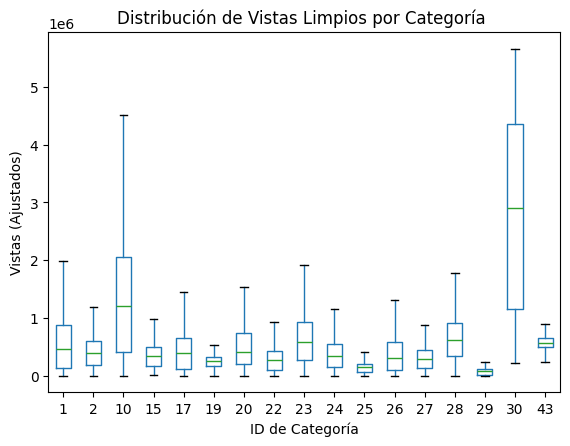

In [ ]:
# Calcular los límites por categoría usando el rango intercuartil (IQR)
def calcular_limites(categoria):
    q1 = categoria.quantile(0.25)
    q3 = categoria.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

# Crear columnas para guardar los valores ajustados
df_limpio['views_cleaned'] = df_limpio['views']

# Reemplazar valores atípicos por la mediana de su categoría
for categoria_id, grupo in df_limpio.groupby('category_id'):
    # Calcular límites específicos para esta categoría
    lower_bound, upper_bound = calcular_limites(grupo['views'])
    mediana = grupo['views'].median()

    # Reemplazar valores atípicos por la mediana de la categoría
    df_limpio.loc[(df_csv['category_id'] == categoria_id) &
               ((df_csv['views'] < lower_bound) | (df_csv['views'] > upper_bound)),
               'views_cleaned'] = mediana


# Crear un boxplot para los valores ajustados
plt.figure(figsize=(12, 6))
df_limpio.boxplot(column='views_cleaned',by='category_id', grid=False, showfliers=False)
plt.title('Distribución de Vistas Limpios por Categoría ')
plt.suptitle('')  # Quitar título automático del grupo
plt.xlabel('ID de Categoría')
plt.ylabel('Vistas (Ajustados)')

plt.show()

**Mostraremos la distribucion de comentarios por categoria**

<ipython-input-19-f95cb9afcf1b>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1437.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_limpio.loc[(df_csv['category_id'] == categoria_id) &


<Figure size 1200x600 with 0 Axes>

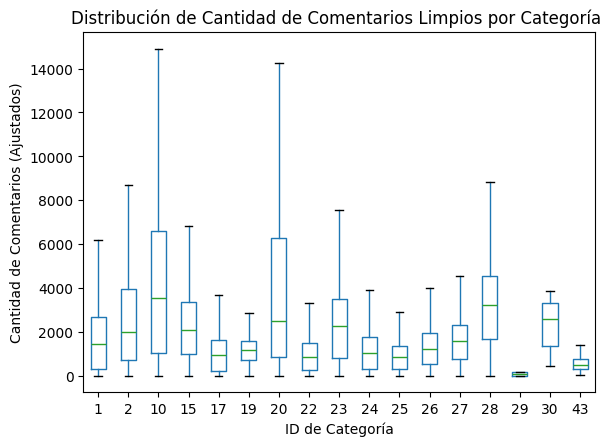

In [ ]:
# Calcular los límites por categoría usando el rango intercuartil (IQR)
def calcular_limites(categoria):
    q1 = categoria.quantile(0.25)
    q3 = categoria.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

# Crear columnas para guardar los valores ajustados
df_limpio['comment_count_cleaned'] = df_limpio['comment_count']

# Reemplazar valores atípicos por la mediana de su categoría
for categoria_id, grupo in df_limpio.groupby('category_id'):
    # Calcular límites específicos para esta categoría
    lower_bound, upper_bound = calcular_limites(grupo['comment_count'])
    mediana = grupo['comment_count'].median()

    # Reemplazar valores atípicos por la mediana de la categoría
    df_limpio.loc[(df_csv['category_id'] == categoria_id) &
               ((df_csv['comment_count'] < lower_bound) | (df_csv['comment_count'] > upper_bound)),
               'comment_count_cleaned'] = mediana


# Crear un boxplot para los valores ajustados
plt.figure(figsize=(12, 6))
df_limpio.boxplot(column='comment_count_cleaned',by='category_id', grid=False, showfliers=False)
plt.title('Distribución de Cantidad de Comentarios Limpios por Categoría ')
plt.suptitle('')  # Quitar título automático del grupo
plt.xlabel('ID de Categoría')
plt.ylabel('Cantidad de Comentarios (Ajustados)')

plt.show()

In [ ]:
df_limpio.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,description,state,lat,lon,geometry,likes_cleaned,dislikes_cleaned,views_cleaned,comment_count_cleaned
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,False,Eminem's new track Walk on Water ft. Beyoncé i...,Manitoba,50.150025,-96.883322,POINT (-96.88332178 50.15002545),50958.0,1285.0,1216670.0,3544.0
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,False,STill got a lot of packages. Probably will las...,British Columbia,49.099960,-116.516697,POINT (-116.516697 49.09996035),22414.0,1688.0,1014651.0,2282.0
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,New Brunswick,45.267042,-66.076675,POINT (-66.07667505000001 45.26704185),22414.0,518.0,583684.0,8181.0
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,False,I know it's been a while since we did this sho...,Saskatchewan,50.933311,-102.799989,POINT (-102.7999891 50.93331097),6208.0,260.0,346166.0,1038.0
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Alberta,53.016698,-112.816639,POINT (-112.8166386 53.01669802),50958.0,1285.0,1216670.0,3544.0


___
**Cantidad de likes y dislikes por categoria**

Para hallar este valor hemos considerado usar la media de este modo no alterar tanto los valores promedios en el dataset.

             Media de Likes  Media de Dislikes
category_id                                   
1              37767.962621        1510.319903
2              13405.422096         560.271955
10            151285.856339        5922.859823
15             23931.533875         501.363144
17             21330.972013        1179.177969
19              9568.658163         331.278061
20             38487.017857        1820.596726
22             25673.219001        2309.572716
23             51960.422475        1423.937185
24             28789.341536        1917.447253
25              7863.682135         784.813898
26             25502.293971         862.242152
27             21162.867810         800.653885
28             37068.916017        1550.781818
29            138413.689189       31429.824324
30             42150.833333        2046.666667
43              4752.120968         971.258065


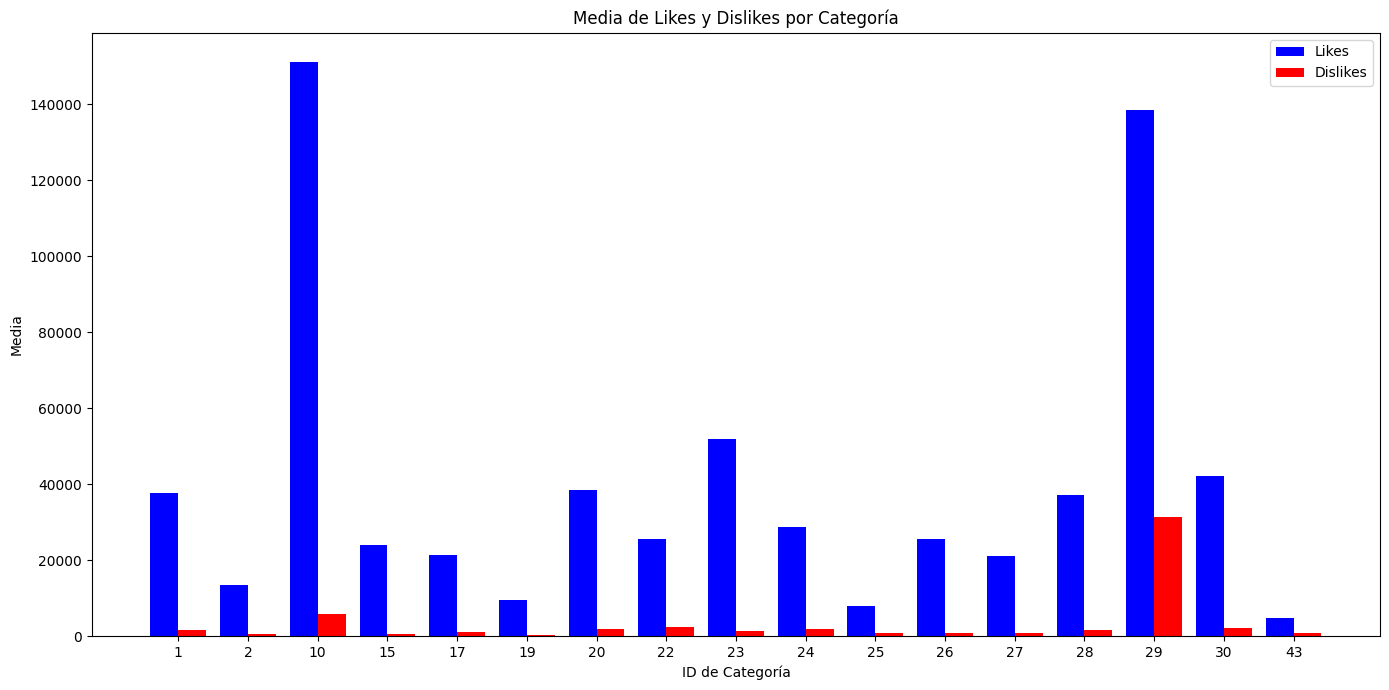

In [ ]:
# Calcular la media de likes y dislikes por categoría
media_likes = df_limpio.groupby('category_id')['likes'].mean()
media_dislikes = df_limpio.groupby('category_id')['dislikes'].mean()

# Combinar las medias en un DataFrame para visualización
resumen_medias = pd.DataFrame({
    'Media de Likes': media_likes,
    'Media de Dislikes': media_dislikes
})

# Mostrar el resumen
print(resumen_medias)

# Visualización de barras para comparación
plt.figure(figsize=(14, 7))
bar_width = 0.4

# Coordenadas para las barras
indices = range(len(resumen_medias))
plt.bar(indices, resumen_medias['Media de Likes'], bar_width, label='Likes', color='blue')
plt.bar([i + bar_width for i in indices], resumen_medias['Media de Dislikes'], bar_width, label='Dislikes', color='red')

# Configuración del gráfico
plt.title('Media de Likes y Dislikes por Categoría')
plt.xlabel('ID de Categoría')
plt.ylabel('Media')
plt.xticks(ticks=[i + bar_width / 2 for i in indices], labels=resumen_medias.index)
plt.legend()

plt.tight_layout()
plt.show()

___
**Comentarios por categoria**

Para obtener este resultado usamos la media de los datos

             Media de Comentarios
category_id                      
1                     4896.394660
2                     2878.719547
10                   14053.940499
15                    4941.837398
17                    2748.956584
19                    1556.002551
20                    7191.136161
22                    4097.003898
23                    5205.082428
24                    4112.187644
25                    2226.445780
26                    4156.909317
27                    2995.374369
28                    6241.748052
29                   43547.851351
30                    2329.833333
43                     622.927419


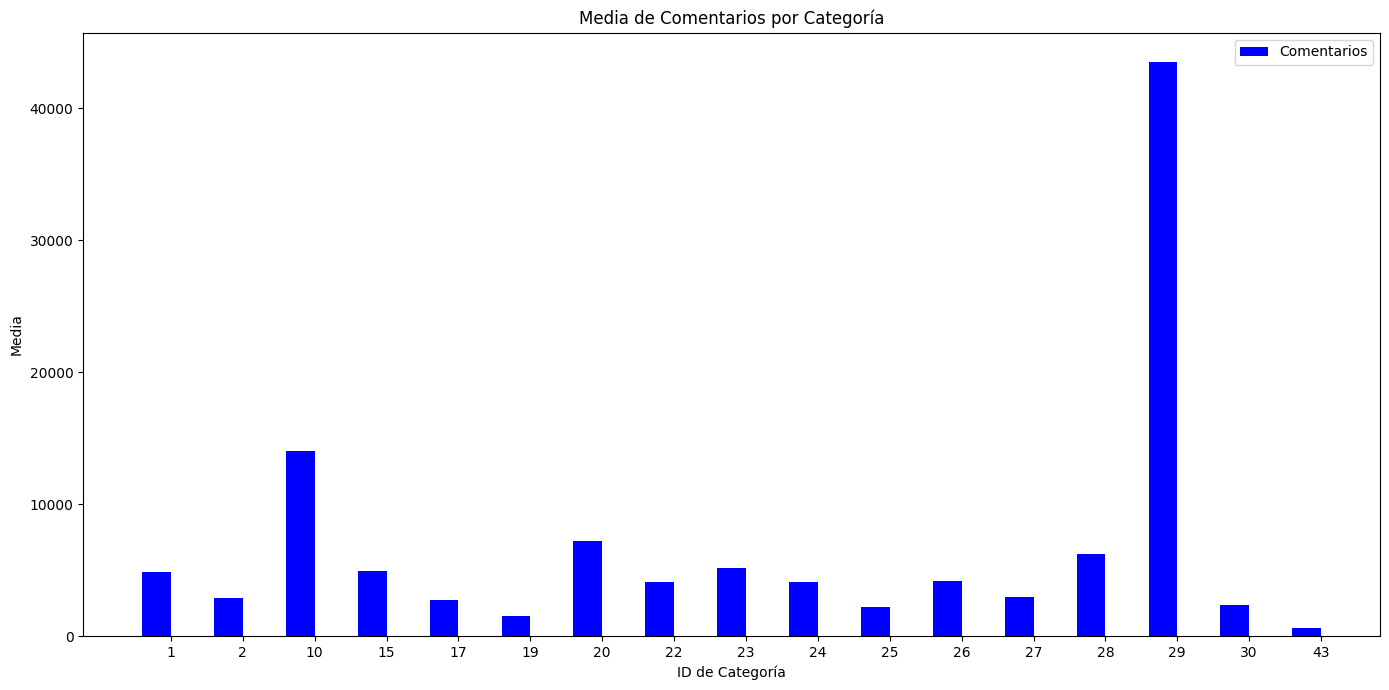

In [ ]:
# Calcular la media de likes y dislikes por categoría
media_comentarios = df_limpio.groupby('category_id')['comment_count'].mean()

# Combinar las medias en un DataFrame para visualización
resumen_media = pd.DataFrame({
    'Media de Comentarios': media_comentarios
})

# Mostrar el resumen
print(resumen_media)

# Visualización de barras para comparación
plt.figure(figsize=(14, 7))
bar_width = 0.4

# Coordenadas para las barras
indices = range(len(resumen_media))
plt.bar(indices, resumen_media['Media de Comentarios'], bar_width, label='Comentarios', color='blue')

# Configuración del gráfico
plt.title('Media de Comentarios por Categoría')
plt.xlabel('ID de Categoría')
plt.ylabel('Media')
plt.xticks(ticks=[i + bar_width / 2 for i in indices], labels=resumen_media.index)
plt.legend()

plt.tight_layout()
plt.show()

___
**Categoria de videos de mayor tendencia**

Text(0.5, -0.1, 'Descripción: La categoría Entertainment (ID 24) tiene el mayor número de tendencias (13451)')

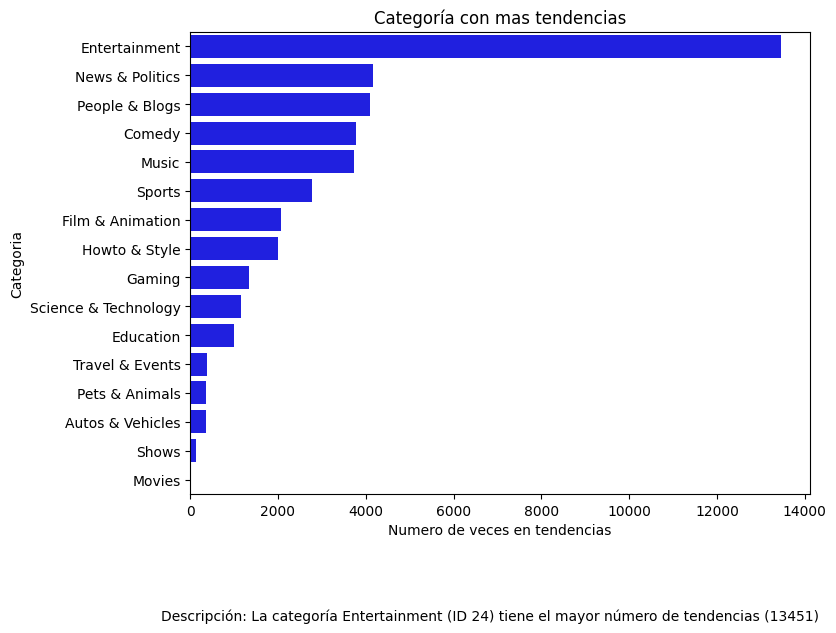

In [ ]:
conteo_categorias = df_csv['category_id'].value_counts().reset_index()
conteo_categorias.columns = ['category_id', 'trend_count']

conteo_categorias['category_title'] = conteo_categorias['category_id'].astype(str).map(categorias)

plt.figure(figsize=(8, 6))
sn.barplot(x='trend_count', y='category_title', data=conteo_categorias, color='blue')

plt.xlabel('Numero de veces en tendencias')
plt.ylabel('Categoria')
plt.title('Categoría con mas tendencias')

plt.figtext(0.5, -0.1, f"Descripción: La categoría {conteo_categorias['category_title'][0]} (ID {conteo_categorias['category_id'][0]}) tiene el mayor número de tendencias ({conteo_categorias['trend_count'][0]})",
            wrap=True, horizontalalignment='center', fontsize=10)


___
**El video con más views**

In [ ]:
df_csv.loc[df_csv['views'].idxmax()]

,5900
video_id,FlsCjmMhFmw
trending_date,17.13.12
title,YouTube Rewind: The Shape of 2017 | #YouTubeRe...
channel_title,YouTube Spotlight
category_id,24
publish_time,2017-12-06T17:58:51.000Z
tags,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y..."
views,137843120
likes,3014479
dislikes,1602383


 ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

<ipython-input-25-3ac90cc4cfc3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='likes', y='category_title', data=top_categories, palette='viridis')


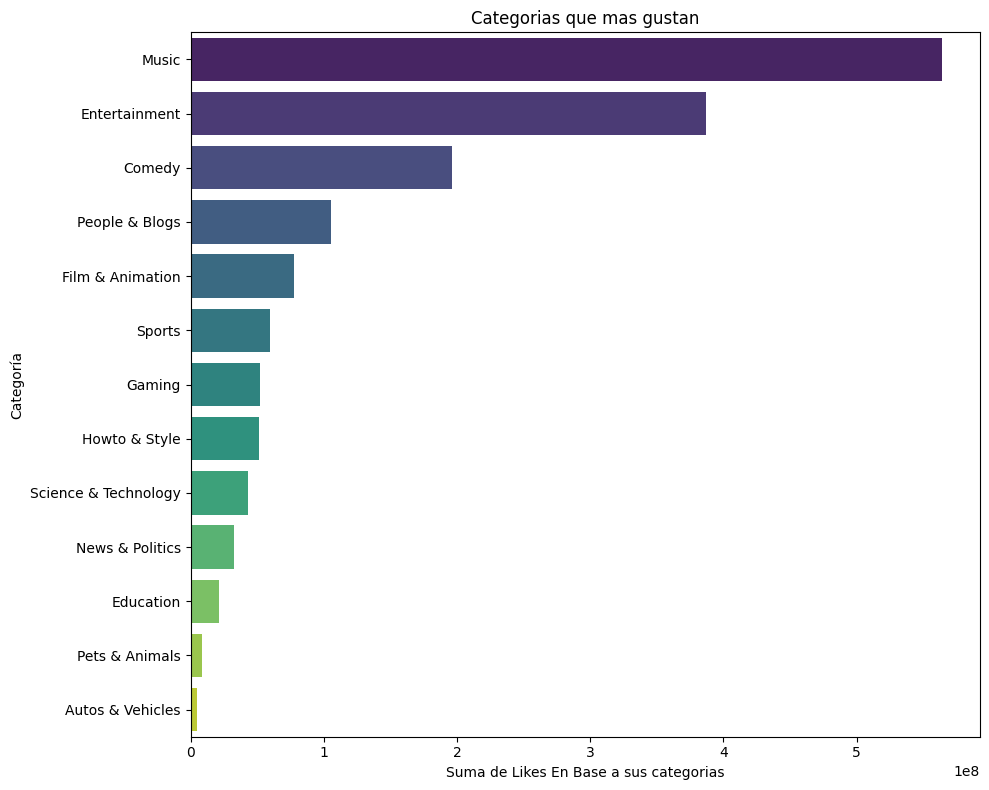

In [ ]:
ordenar = df_limpio.groupby('category_id')['likes'].sum().reset_index()
ordenar['category_title'] = ordenar['category_id'].astype(str).map(categorias)
ordenar = ordenar.sort_values(by='likes', ascending=False)
top_categories = ordenar.head(14)

plt.figure(figsize=(10, 8))
sn.barplot(x='likes', y='category_title', data=top_categories, palette='viridis')
plt.xlabel('Suma de Likes En Base a sus categorias')
plt.ylabel('Categoría')
plt.title('Categorias que mas gustan')
plt.tight_layout()
plt.show()

___
**¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me
gusta”?**


<ipython-input-97-76daaffee9ac>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='ratio_likes_dislikes', y='category_title', data=top_categories, palette='viridis')


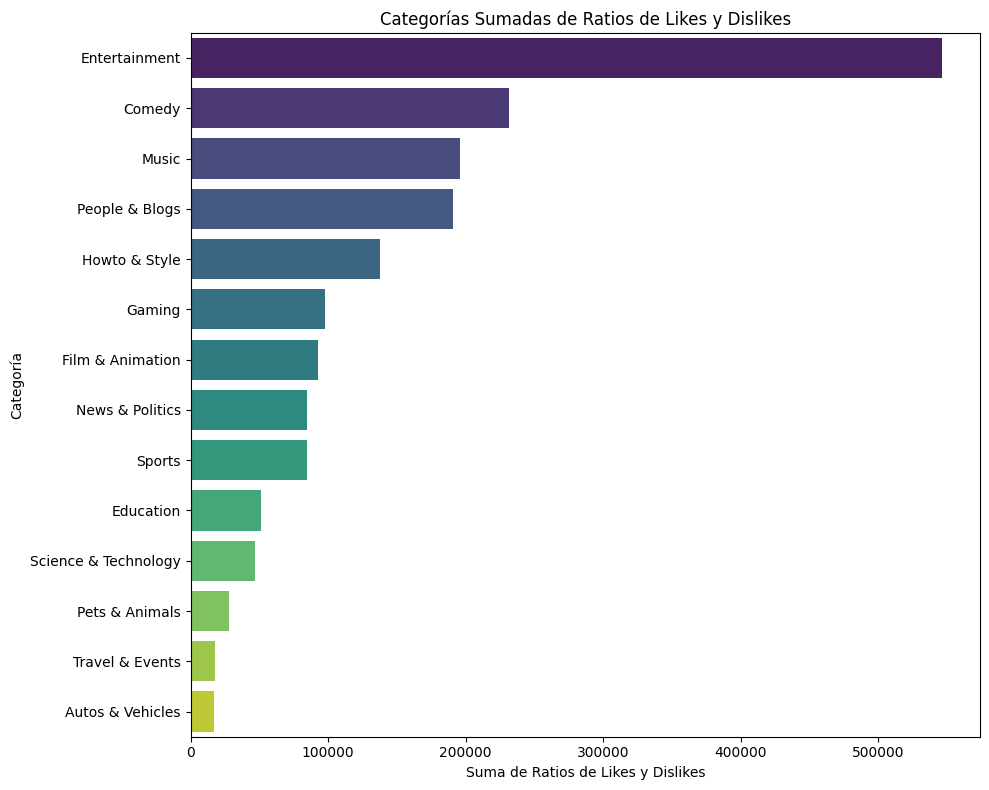

In [ ]:
df_limpio['ratio_likes_dislikes'] = df_limpio['likes'] / df_limpio['dislikes']
ordenar_ratios = df_limpio.groupby('category_id')['ratio_likes_dislikes'].sum().reset_index()
ordenar_ratios['category_title'] = ordenar_ratios['category_id'].astype(str).map(categorias)
ordenar_ratios = ordenar_ratios.sort_values(by='ratio_likes_dislikes', ascending=False)
top_categories = ordenar_ratios.head(14)

plt.figure(figsize=(10, 8))
sn.barplot(x='ratio_likes_dislikes', y='category_title', data=top_categories, palette='viridis')
plt.xlabel('Suma de Ratios de Likes y Dislikes')
plt.ylabel('Categoría')
plt.title('Categorías Sumadas de Ratios de Likes y Dislikes')
plt.tight_layout()
plt.show()

___
**¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” /
“Comentarios”?**


<ipython-input-100-7c2919c7c745>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='ratio_views_comments', y='category_title', data=top_categories, palette='viridis')


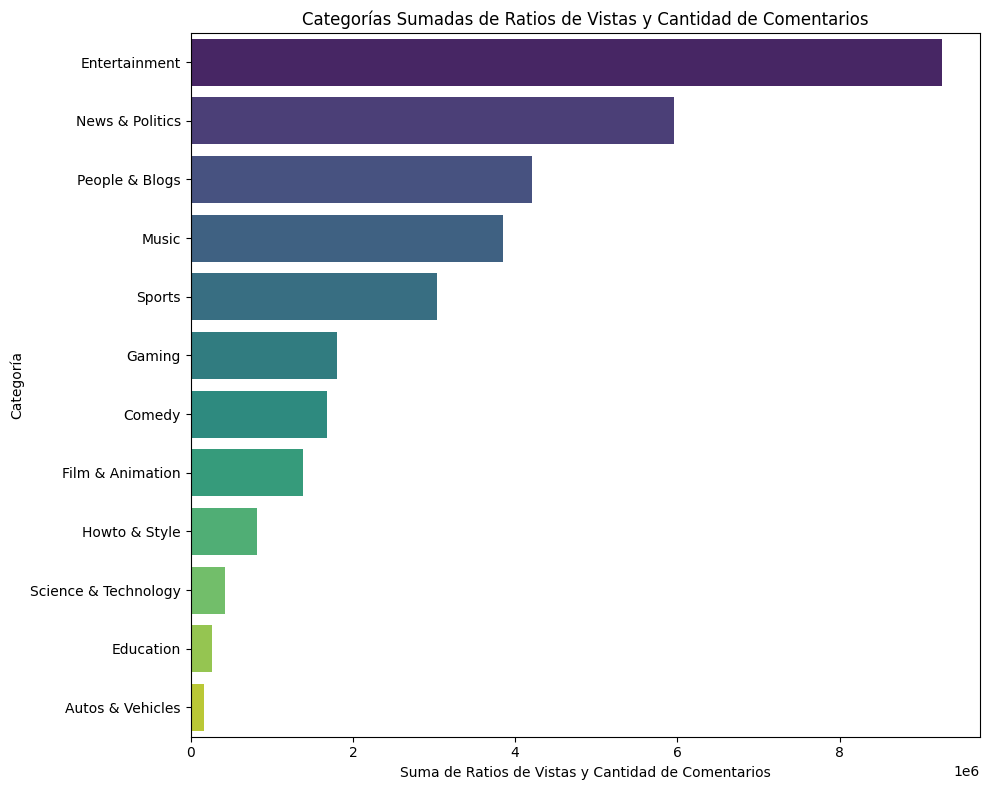

In [ ]:
df_limpio['ratio_views_comments'] =  df_limpio['views']/df_limpio['comment_count']
ordenar_ratios = df_limpio.groupby('category_id')['ratio_views_comments'].sum().reset_index()
ordenar_ratios['category_title'] = ordenar_ratios['category_id'].astype(str).map(categorias)
ordenar_ratios = ordenar_ratios.sort_values(by='ratio_views_comments', ascending=False)
top_categories = ordenar_ratios.head(14)

plt.figure(figsize=(10, 8))
sn.barplot(x='ratio_views_comments', y='category_title', data=top_categories, palette='viridis')
plt.xlabel('Suma de Ratios de Vistas y Cantidad de Comentarios')
plt.ylabel('Categoría')
plt.title('Categorías Sumadas de Ratios de Vistas y Cantidad de Comentarios')
plt.tight_layout()
plt.show()

___
**Canales con mayor presencia**

<ipython-input-28-c090c31a91ed>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='apariciones', y='channel_title', data=top_canales, palette='viridis')


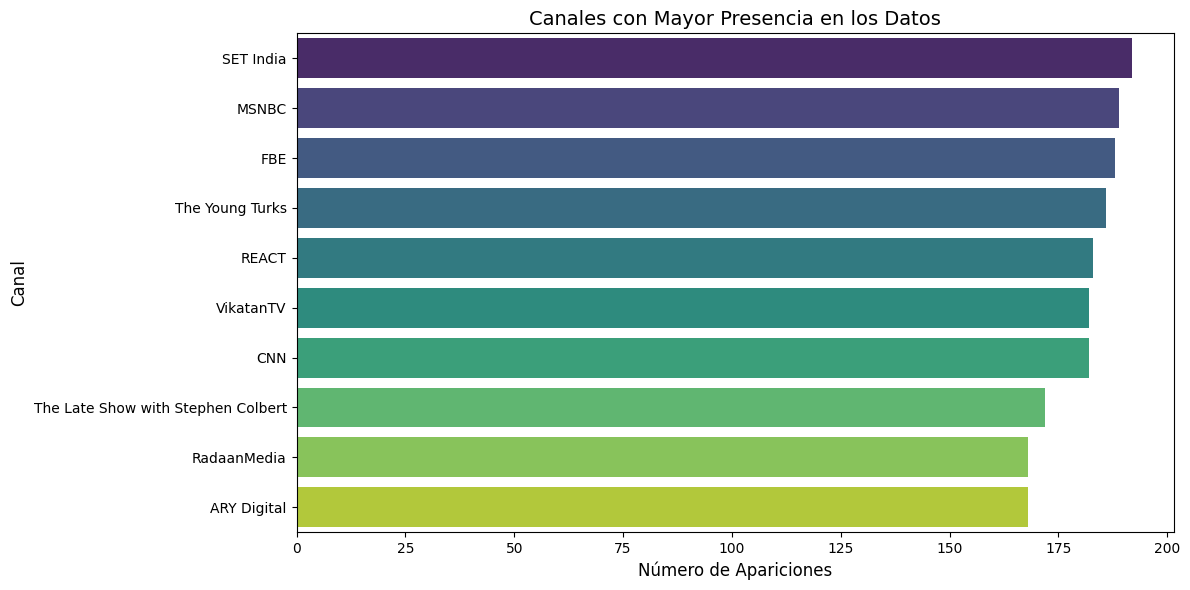

In [ ]:
canal_tendencia = df_limpio['channel_title'].value_counts().reset_index()
canal_tendencia.columns = ['channel_title', 'apariciones']
canal_tendencia = canal_tendencia.sort_values(by='apariciones', ascending=False)
top_canales = canal_tendencia.head(10)

plt.figure(figsize=(12, 6))
sn.barplot(x='apariciones', y='channel_title', data=top_canales, palette='viridis')
plt.xlabel('Número de Apariciones', fontsize=12)
plt.ylabel('Canal', fontsize=12)
plt.title('Canales con Mayor Presencia en los Datos', fontsize=14)
plt.tight_layout()
plt.show()


Canales con menor presencia

<ipython-input-29-e7a850ba9562>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='apariciones', y='channel_title', data=top_canales, palette='viridis')


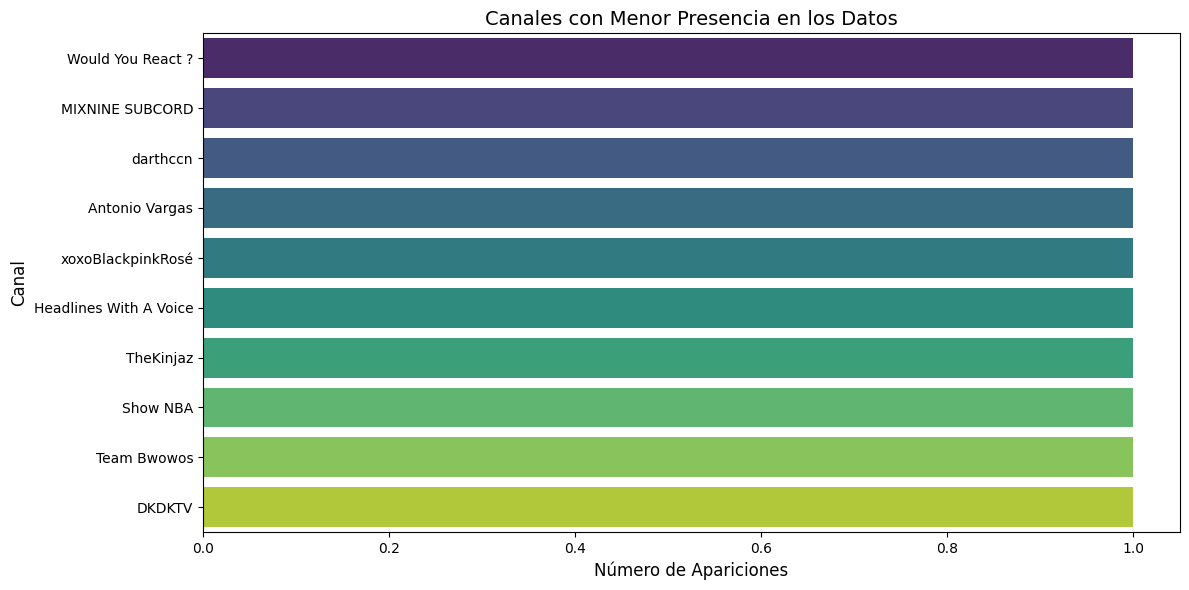

In [ ]:
canal_tendencia = df_limpio['channel_title'].value_counts().reset_index()
canal_tendencia.columns = ['channel_title', 'apariciones']
canal_tendencia = canal_tendencia.sort_values(by='apariciones', ascending=False)
top_canales = canal_tendencia.tail(10)

plt.figure(figsize=(12, 6))
sn.barplot(x='apariciones', y='channel_title', data=top_canales, palette='viridis')
plt.xlabel('Número de Apariciones', fontsize=12)
plt.ylabel('Canal', fontsize=12)
plt.title('Canales con Menor Presencia en los Datos', fontsize=14)
plt.tight_layout()
plt.show()

___
**Volumen de videos en tendencias a traves del tiempo**

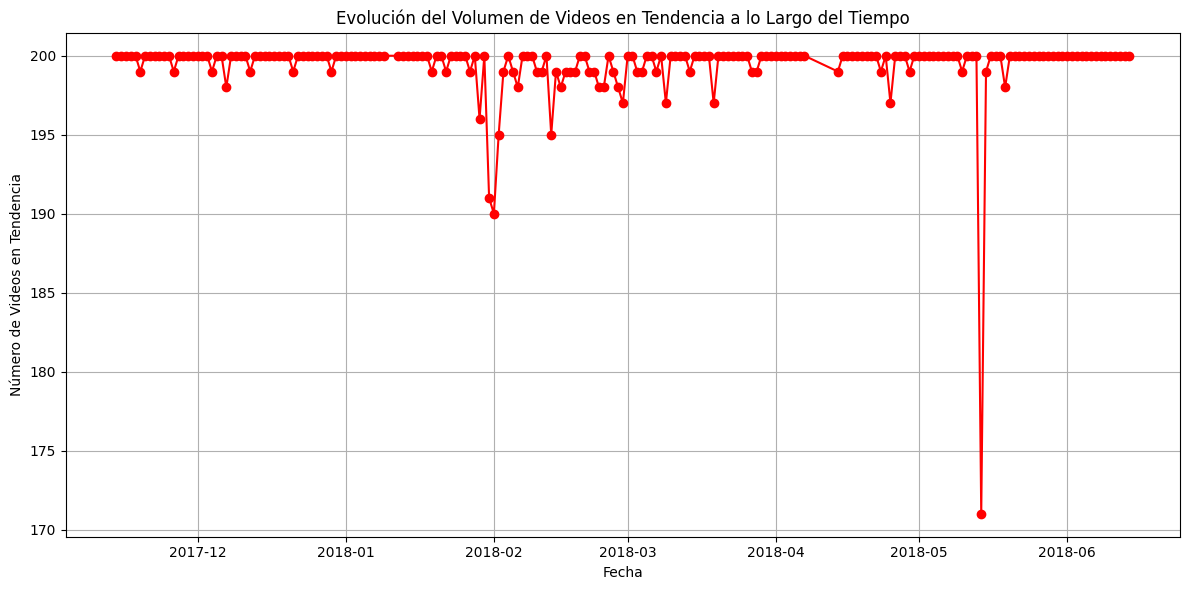

In [ ]:
df_limpio['trending_date_formato'] = pd.to_datetime(
    df_limpio['trending_date'],
    format='%y.%d.%m'
)

# Contar el número de videos en tendencia por día
trend_volume = df_limpio.groupby('trending_date_formato').size()

x = trend_volume.index
y = trend_volume.values

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'r', marker='o')
plt.xlabel('Fecha')
plt.ylabel('Número de Videos en Tendencia')
plt.title('Evolución del Volumen de Videos en Tendencia a lo Largo del Tiempo')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_limpio.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,lat,lon,geometry,likes_cleaned,dislikes_cleaned,views_cleaned,comment_count_cleaned,ratio_likes_dislikes,ratio_views_comments,trending_date_formato
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,50.150025,-96.883322,POINT (-96.88332178 50.15002545),50958.0,1285.0,1216670.0,3544.0,18.135076,0.103464,2017-11-14
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,49.099960,-116.516697,POINT (-116.516697 49.09996035),22414.0,1688.0,1014651.0,2282.0,75.707346,0.012842,2017-11-14
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,45.267042,-66.076675,POINT (-66.07667505000001 45.26704185),22414.0,518.0,583684.0,8181.0,27.352500,0.014016,2017-11-14
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,50.933311,-102.799989,POINT (-102.7999891 50.93331097),6208.0,260.0,346166.0,1038.0,66.485168,0.050606,2017-11-14
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,53.016698,-112.816639,POINT (-112.8166386 53.01669802),50958.0,1285.0,1216670.0,3544.0,77.513044,0.069918,2017-11-14


In [ ]:
df_limpio.to_csv('df_limpio.csv', index=False)

Modelado


In [ ]:
columnas_a_copiar = ['likes', 'dislikes','views','category_id','comment_count']
df_modelar= df_csv[columnas_a_copiar]
df_modelarb = pd.get_dummies(df_modelar, columns=['category_id'], prefix='category', drop_first=True)
df_modelarb

,likes,dislikes,views,comment_count,category_2,category_10,category_15,category_17,category_19,category_20,category_22,category_23,category_24,category_25,category_26,category_27,category_28,category_29,category_30,category_43
0,787425,43420,17158579,125882,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,127794,1688,1014651,13030,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,146035,5339,3191434,8181,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,132239,1989,2095828,17518,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,1634130,21082,33523622,85067,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,1701,99,80685,1312,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
40877,460,66,103339,51,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
40878,25900,224,773347,3881,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
40879,2115,182,115225,1672,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


<Axes: >

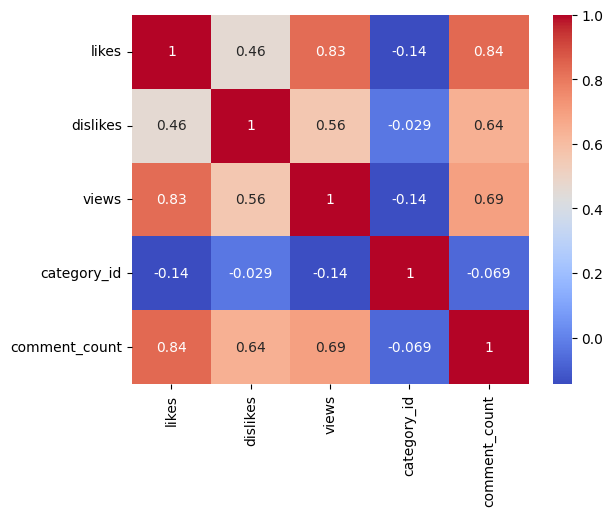

In [ ]:
sns.heatmap(df_modelar.corr(),cmap='coolwarm',annot=True)

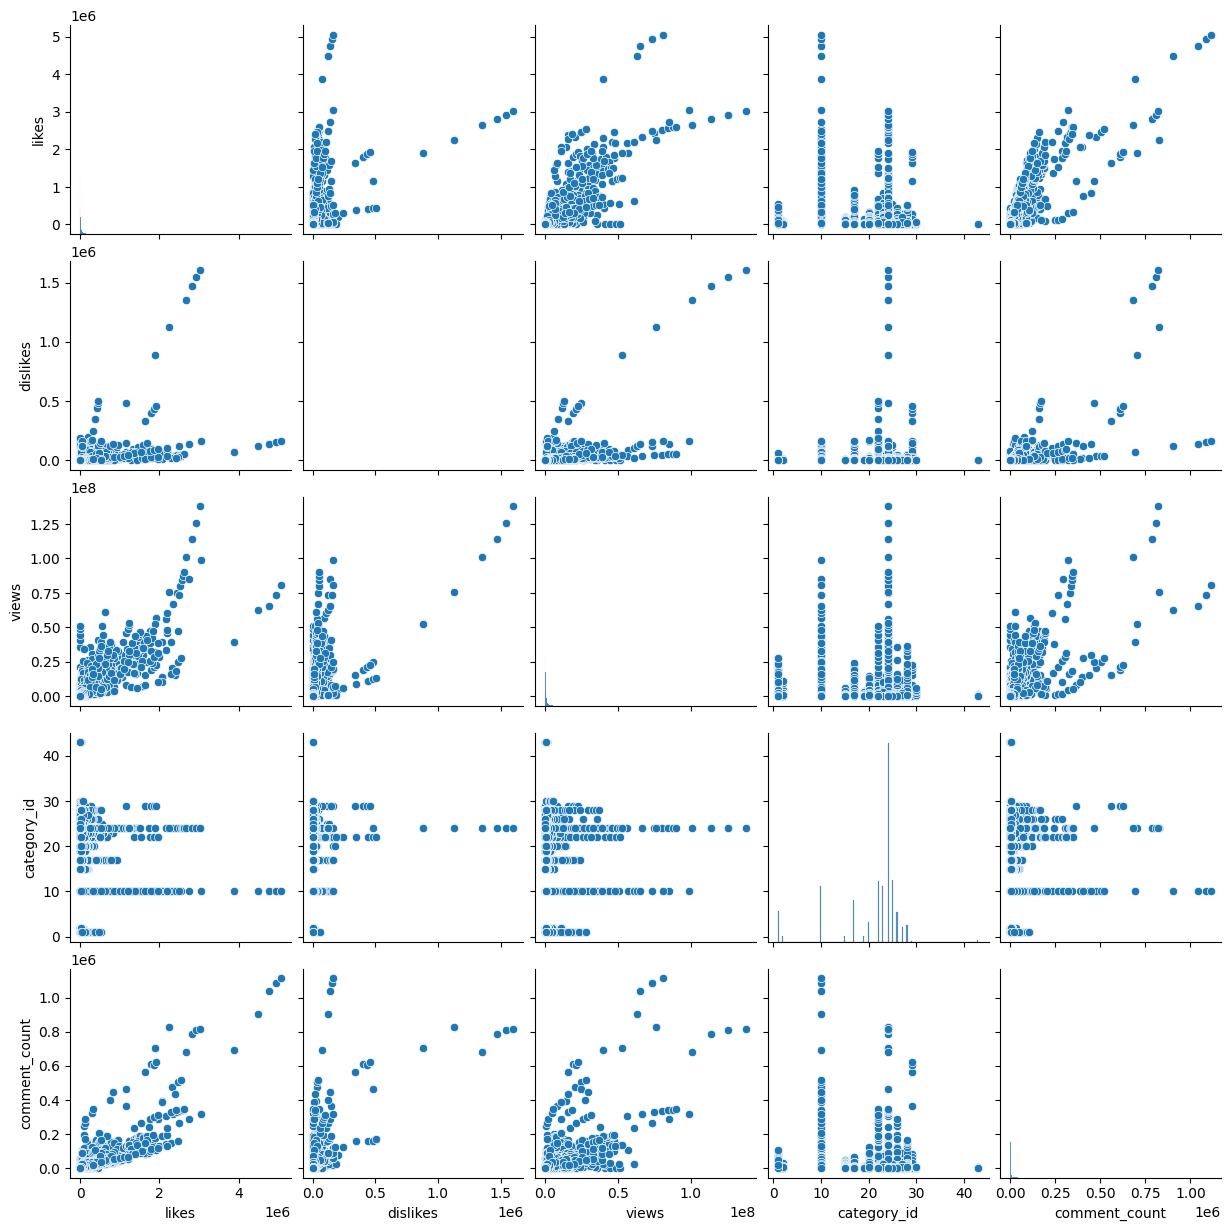

In [ ]:
sns.pairplot(df_modelar)

Modelar para visitas


In [ ]:
X = df_modelarb.iloc[:,[0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]
Y= df_modelarb['views']

In [ ]:
# División de los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=1280)

In [ ]:
X_train

,likes,dislikes,comment_count,category_2,category_10,category_15,category_17,category_19,category_20,category_22,category_23,category_24,category_25,category_26,category_27,category_28,category_29,category_30,category_43
25631,41911,925,4243,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20551,95485,2061,13526,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
39804,1386,210,208,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
27386,11970,390,1008,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4621,19878,476,3238,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24291,14032,1785,1114,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
37579,415,53,77,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
21360,21919,399,4883,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
17713,13453,667,1823,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [ ]:
#Definimos el algoritmo a utilizar
modelo_rm = LinearRegression()
#Entrenamos el modelo
modelo_rm.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
# Pendiente
print("Pendiente: ",modelo_rm.coef_)
# Interceptor
print("Interceptor: ",modelo_rm.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Pendiente:  [ 2.38239276e+01  5.52162625e+01 -4.07561458e+01 -3.43946296e+05
 -4.30182174e+05 -3.95308748e+05 -5.91690394e+04 -4.85460586e+05
 -4.41981544e+05 -4.27214637e+05 -7.60380427e+05 -2.56615787e+05
 -4.08172325e+05 -3.68901031e+05 -5.37419454e+05 -1.24321397e+05
 -2.57863858e+06  1.54338136e+06 -2.24236303e+05]
Interceptor:  652273.2509250704


In [ ]:
#Realizamos una predicción
Y_pred = modelo_rm.predict(X_test)
Y_pred
df_pred = pd.DataFrame(X_test)
df_pred = df_pred.assign(Views=y_test)
df_pred = df_pred.assign(Pred = Y_pred.flatten().tolist())
df_pred.head(10)

,likes,dislikes,comment_count,category_2,category_10,category_15,category_17,category_19,category_20,category_22,...,category_24,category_25,category_26,category_27,category_28,category_29,category_30,category_43,Views,Pred
18264,4032,2068,501,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,997580,6.178634e+05
40799,10070,3303,2142,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,402418,5.600452e+05
10088,4098,100,1167,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,90557,2.996906e+05
10659,6301,132,1881,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,112744,3.057994e+05
21923,7527,626,1065,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,422041,3.925739e+05
10166,8646,203,859,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,187309,4.905080e+05
10330,17201,113,1186,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,239806,6.510702e+05
8770,1470,115,549,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,67317,3.273229e+05
28573,21916,823,2402,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,713642,9.976238e+05
29218,70344,403,5438,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1400224,1.698582e+06


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


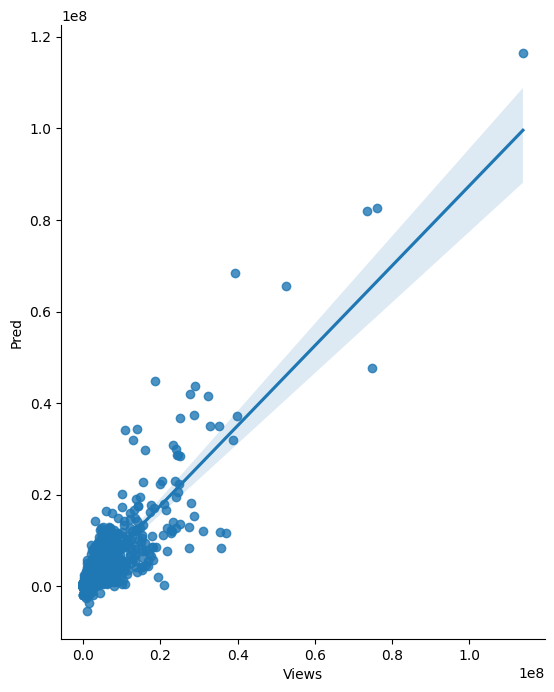

In [ ]:
sns.pairplot(df_pred, x_vars=['Views'], y_vars='Pred', size=7, aspect=0.8,kind = 'reg')

In [ ]:
# calcular estas métricas
print('MAE:', metrics.mean_absolute_error(y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

MAE: 630637.83673206
MSE: 2547751599643.718
RMSE: 1596167.7855550519


In [ ]:
# Precisiòn del Modelo (Coeficiente de determinación)
print("Precisión del Modelo: ",metrics.r2_score(y_test,Y_pred))

Precisión del Modelo:  0.7638420002672334


Modelo para Likes

In [ ]:
X = df_modelarb.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]
Y= df_modelarb['likes']

In [ ]:
# División de los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=1280)

In [ ]:
#Definimos el algoritmo a utilizar
modelo_rm = LinearRegression()
#Entrenamos el modelo
modelo_rm.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
# Pendiente
print("Pendiente: ",modelo_rm.coef_)
# Interceptor
print("Interceptor: ",modelo_rm.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Pendiente:  [-1.45389168e+00  1.95044310e-02  3.78038061e+00 -6.70349943e+02
  4.39893218e+04 -4.10061363e+00 -1.10526489e+03  4.20518546e+03
  2.63773636e+03  4.66772542e+03  2.15783382e+04  3.28193820e+03
  9.32710949e+01  3.07315734e+03  7.28485943e+03 -1.44945128e+03
 -4.19537515e+03 -1.70541588e+04 -4.74896299e+02]
Interceptor:  -6869.186968565809


In [ ]:
#Realizamos una predicción
Y_pred = modelo_rm.predict(X_test)
Y_pred
df_pred = pd.DataFrame(X_test)
df_pred = df_pred.assign(Likes=y_test)
df_pred = df_pred.assign(Pred = Y_pred.flatten().tolist())
df_pred.head(10)

,dislikes,views,comment_count,category_2,category_10,category_15,category_17,category_19,category_20,category_22,...,category_24,category_25,category_26,category_27,category_28,category_29,category_30,category_43,Likes,Pred
18264,2068,997580,501,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,4032,11000.469711
40799,3303,402418,2142,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,10070,8942.843621
10088,100,90557,1167,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,4098,-743.338112
10659,132,112744,1881,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,6301,6916.528242
21923,626,422041,1065,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,7527,48467.773586
10166,203,187309,859,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,8646,-933.974511
10330,113,239806,1186,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,17201,5200.491593
8770,115,67317,549,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1470,-4318.325718
28573,823,713642,2402,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,21916,13484.464278
29218,403,1400224,5438,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,70344,84402.498668


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


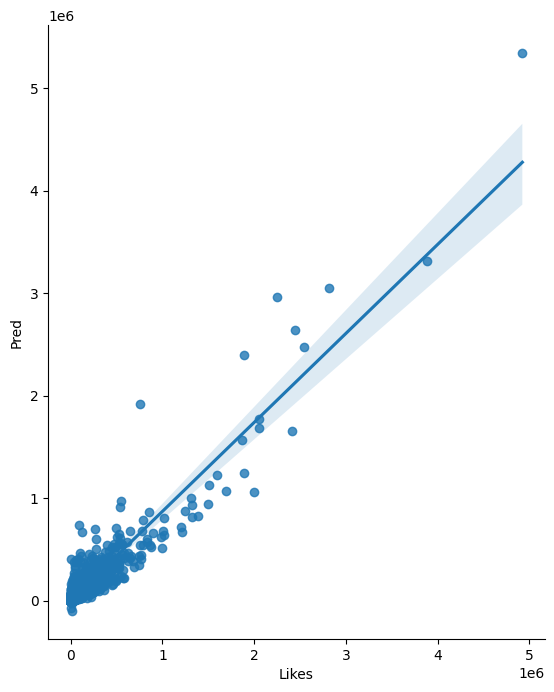

In [ ]:
sns.pairplot(df_pred, x_vars=['Likes'], y_vars='Pred', size=7, aspect=0.8,kind = 'reg')

In [48]:
# calcular estas métricas
print('MAE:', metrics.mean_absolute_error(y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

MAE: 630637.83673206
MSE: 2547751599643.718
RMSE: 1596167.7855550519


In [49]:
# Precisiòn del Modelo (Coeficiente de determinación)
print("Precisión del Modelo: ",metrics.r2_score(y_test,Y_pred))

Precisión del Modelo:  0.7638420002672334


Modelo para Dislikes

In [50]:
X = df_modelarb.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]
Y= df_modelarb['dislikes']

In [51]:
# División de los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=1280)

In [52]:
#Definimos el algoritmo a utilizar
modelo_rm = LinearRegression()
#Entrenamos el modelo
modelo_rm.fit(X_train,y_train)

LinearRegression()

In [53]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
# Pendiente
print("Pendiente: ",modelo_rm.coef_)
# Interceptor
print("Interceptor: ",modelo_rm.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Pendiente:  [-8.84758175e-02  2.75092953e-03  6.83993076e-01  8.66663036e+02
  2.63321383e+03  4.59485927e+01  8.32933831e+02  1.69715101e+03
  3.22019971e+02  2.05846904e+03  2.31274009e+03  1.31123692e+03
  1.49923994e+03  7.86511180e+02  1.74797501e+03 -2.52207185e+02
  1.33486613e+04 -1.84208078e+03  1.95865384e+03]
Interceptor:  -2584.085960022632


In [54]:
#Realizamos una predicción
Y_pred = modelo_rm.predict(X_test)
Y_pred
df_pred = pd.DataFrame(X_test)
df_pred = df_pred.assign(Dislikes=y_test)
df_pred = df_pred.assign(Pred = Y_pred.flatten().tolist())
df_pred.head(10)

,likes,views,comment_count,category_2,category_10,category_15,category_17,category_19,category_20,category_22,...,category_24,category_25,category_26,category_27,category_28,category_29,category_30,category_43,Dislikes,Pred
18264,4032,997580,501,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,2068,2104.786198
40799,10070,402418,2142,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,3303,1155.568328
10088,4098,90557,1167,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,100,-400.084074
10659,6301,112744,1881,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,132,513.638731
21923,7527,422041,1065,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,626,1272.628071
10166,8646,187309,859,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,203,-1379.560930
10330,17201,239806,1186,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,113,-1848.542122
8770,1470,67317,549,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,115,-1286.785854
28573,21916,713642,2402,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,823,-1169.198941
29218,70344,1400224,5438,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,403,1396.856864


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


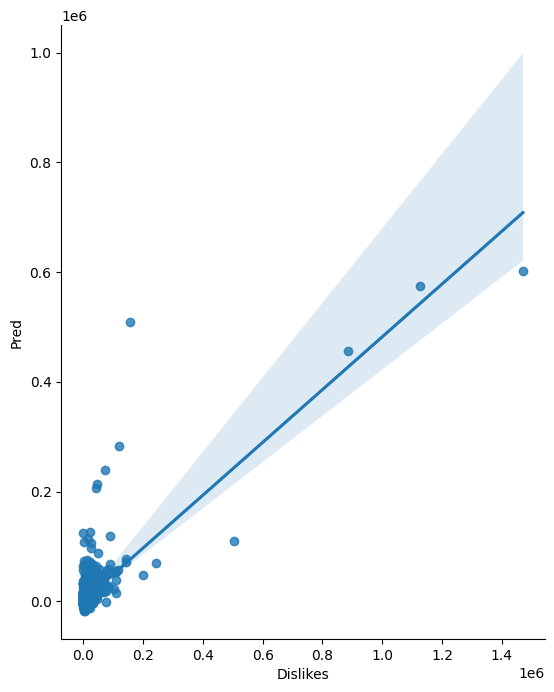

In [55]:
sns.pairplot(df_pred, x_vars=['Dislikes'], y_vars='Pred', size=7, aspect=0.8,kind = 'reg')

In [56]:
# calcular estas métricas
print('MAE:', metrics.mean_absolute_error(y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

MAE: 2743.1940942213164
MSE: 243474021.8288881
RMSE: 15603.65411783048


In [57]:
# Precisiòn del Modelo (Coeficiente de determinación)
print("Precisión del Modelo: ",metrics.r2_score(y_test,Y_pred))

Precisión del Modelo:  0.5978973833824565
